In [1]:
import numpy as np
import pandas as pd
import os
import glob

import nilearn
from nilearn import datasets, plotting,signal # datasets: for fetching atlas
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

from nilearn.glm.first_level import make_first_level_design_matrix

import matplotlib.pyplot as plt

os.chdir("/home/acamassa/ABCD/DDC/src/py_DDC")
from Compute_DDC import *

/home/acamassa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
import glob

os.chdir("/nadata/cnl/abcd/data/imaging/fmri/nback/interim/segmented/baseline/")
# os.chdir('/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline_depr/')
files = glob.glob("**/filt_fMRI_segmented**.csv", recursive=True)
ddc_dir='/cnl/abcd/data/imaging/fmri/nback/interim/DDC/baseline/'

In [3]:
len(files)

12308

In [4]:
path='/cnl/abcd/data/imaging/fmri/nback/interim/DDC/baseline/'
dataset=[]

for filename in glob.iglob(path + '**/subc_Reg_DDC*2_back.csv', recursive=True):
    dataset.append(filename)
    # print(filename)

In [5]:
len(dataset)

10970

In [6]:
error=[]

for f in files:
    
    for cond in ['2_back','0_back']:
        
        #subject
        sub_id=f.split('/')[0]
        run=f[-10:-4] 
        
        if not os.path.exists(ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Reg_DDC_" + run + '_' + cond + '.csv'):
            print(f"{sub_id}, run:{run}")
            try:
                # load segmented data
                data=pd.read_csv(f)
                timeseries_all=np.asarray(data)


                #load events onset
                events = pd.read_table(f'/snl/abcd/raw-data/fmri/baseline/nback/{sub_id}/ses-baselineYear1Arm1/func/{sub_id}_ses-baselineYear1Arm1_task-nback_{run}_events.tsv')
    #                 events = pd.read_table(f'/snl/abcd/raw-data/fmri/baseline/nback/{sub_id}/ses-baselineYear1Arm1/func/{sub_id}_ses-baselineYear1Arm1_task-nback_{run}_events.tsv')
                if len(events)==1:
                    print('no events')
                t_r = 0.8
                n_scans = len(timeseries_all)

                # make design matrix
                frame_times = np.arange(n_scans) * t_r
                design_matrix = make_first_level_design_matrix(frame_times, events, hrf_model = None)
                design_matrix = design_matrix.reset_index()

                # extract one condition
                string_cols = design_matrix.filter(regex=f'^{cond}')
                A = string_cols.sum(axis=1) 
                task = timeseries_all[A.astype('bool').astype('bool'), :]

                # compute DDC
                Cov, DDC, Reg_DDC, nl_DDC, qc_flag = compute_ddc(task, 0.8, "c")

                if not os.path.exists(ddc_dir + f.split("/")[0] + "/single_sessions/"):
                    print("making dir:", ddc_dir + f.split("/")[0] + "/single_sessions/")
                    os.makedirs(ddc_dir + f.split("/")[0] + "/single_sessions/")


                pd.DataFrame(Cov).to_csv(
                ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Cov_" + run + '_' + cond + '.csv' ,
                header=None,
                index=None,
                )
                pd.DataFrame(DDC).to_csv(
                    ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_DDC_"+ run + '_' + cond + '.csv',
                    header=None,
                    index=None,
                )
                pd.DataFrame(Reg_DDC).to_csv(
                    ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Reg_DDC_" + run + '_' + cond + '.csv',
                    header=None,
                    index=None,
                )

                # compute fractional DDC and reg fract DDC
                FDDC, Reg_FDDC = compute_fddc(task, 0.8, 0.5)
                pd.DataFrame(FDDC).to_csv(
                    ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_FDDC_" + run + '_' + cond + '.csv',
                    header=None,
                    index=None,
                )
                pd.DataFrame(Reg_FDDC).to_csv(
                    ddc_dir
                    + f.split("/")[0]
                    + "/single_sessions/"
                    + "subc_Reg_FDDC_"
                    + run + '_' + cond + '.csv',
                    header=None,
                    index=None,
                )

                print(f"contition {cond} saved")
            except:
                print('error')
                error.append(f)



sub-NDARINVJ9D04KNJ, run:run-01
no events
error
sub-NDARINVJ9D04KNJ, run:run-01
no events
error
sub-NDARINVJ9D04KNJ, run:run-02
no events
error
sub-NDARINVJ9D04KNJ, run:run-02
no events
error
sub-NDARINV5VMC4WL1, run:run-02
no events
error
sub-NDARINV5VMC4WL1, run:run-02
no events
error
sub-NDARINV1ZKDLXEY, run:run-01
no events
error
sub-NDARINV1ZKDLXEY, run:run-01
no events
error
sub-NDARINV1ZKDLXEY, run:run-02
no events
error
sub-NDARINV1ZKDLXEY, run:run-02
no events
error
sub-NDARINVDTHJM3Y9, run:run-01
no events
error
sub-NDARINVDTHJM3Y9, run:run-01
no events
error
sub-NDARINVDTHJM3Y9, run:run-02
no events
error
sub-NDARINVDTHJM3Y9, run:run-02
no events
error
sub-NDARINVJ67B8F0J, run:run-01
no events
error
sub-NDARINVJ67B8F0J, run:run-01
no events
error
sub-NDARINVJ67B8F0J, run:run-02
no events
error
sub-NDARINVJ67B8F0J, run:run-02
no events
error
sub-NDARINV13276WYW, run:run-01
no events
error
sub-NDARINV13276WYW, run:run-01
no events
error
sub-NDARINV13276WYW, run:run-02
no event

/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/glm/_utils.py:321: UserWarning: Matrix is singular at working precision, regularizing...
  warn("Matrix is singular at working precision, regularizing...")


Cov is rank deficient!
contition 2_back saved
sub-NDARINVV8URWFJ6, run:run-01


/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/glm/_utils.py:321: UserWarning: Matrix is singular at working precision, regularizing...
  warn("Matrix is singular at working precision, regularizing...")


Cov is rank deficient!
contition 0_back saved
sub-NDARINVV8URWFJ6, run:run-02
Cov is rank deficient!
contition 2_back saved
sub-NDARINVV8URWFJ6, run:run-02
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVB08AETV, run:run-01
Cov is rank deficient!
contition 2_back saved
sub-NDARINVVB08AETV, run:run-01
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVB08AETV, run:run-02
Cov is rank deficient!
contition 2_back saved
sub-NDARINVVB08AETV, run:run-02
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVCKR7V40, run:run-01
Cov is rank deficient!
contition 2_back saved
sub-NDARINVVCKR7V40, run:run-01
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVCKR7V40, run:run-02
Cov is rank deficient!
contition 2_back saved
sub-NDARINVVCKR7V40, run:run-02
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVP326VDY, run:run-01
Cov is rank deficient!
contition 2_back saved
sub-NDARINVVP326VDY, run:run-01
Cov is rank deficient!
contition 0_back saved
sub-NDARINVVP326VD

In [22]:
len(events)

1

In [7]:
len(error)

60

In [24]:
np.savetxt('/home/acamassa/ABCD/task_DDCerrors', error, fmt='%s')

In [9]:
import pandas as pd

data=pd.read_csv(files[0])

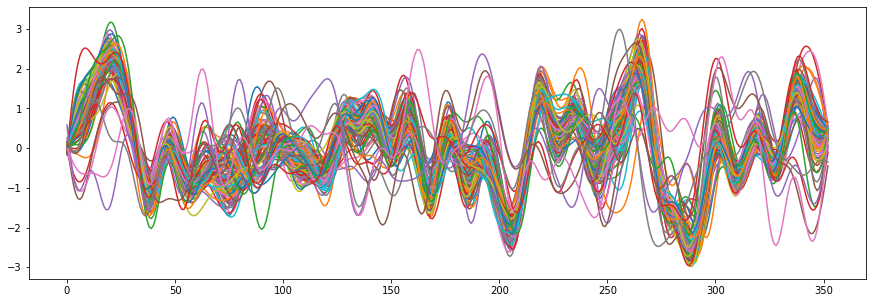

In [10]:
timeseries_all=np.asarray(data)
plt.figure(figsize = (15, 5))
plt.plot(timeseries_all)
plt.show()


In [9]:
sub_id=files[0].split('/')[0]
run=f[-10:-4]
confounds= pd.read_table(f'/snl/abcd/raw-data/fmri/baseline/nback/{sub_id}/ses-baselineYear1Arm1/func/{sub_id}_ses-baselineYear1Arm1_task-nback_{run}_motion.tsv')
events = pd.read_table(f'/snl/abcd/raw-data/fmri/baseline/nback/{sub_id}/ses-baselineYear1Arm1/func/{sub_id}_ses-baselineYear1Arm1_task-nback_{run}_events.tsv')


In [10]:
t_r = 0.8
n_scans = len(timeseries_all)

frame_times = np.arange(n_scans) * t_r
frame_times

design_matrix = make_first_level_design_matrix(frame_times, events, hrf_model = None)
design_matrix = design_matrix.reset_index()


conditions = {}

cond_a = '2_back'
cond_b = '0_back'


# Find all col indices matching 2-back:
A = design_matrix.keys().str.contains(cond_a, regex=False).astype(int) # cast to 0-1
B = design_matrix.keys().str.contains(cond_b, regex=False).astype(int) # cast to 0-1




In [11]:
# Filter columns that start with 'string'
string_cols = design_matrix.filter(regex='^0_back')
A = string_cols.sum(axis=1)

string_cols = design_matrix.filter(regex='^2_back')
B = string_cols.sum(axis=1)

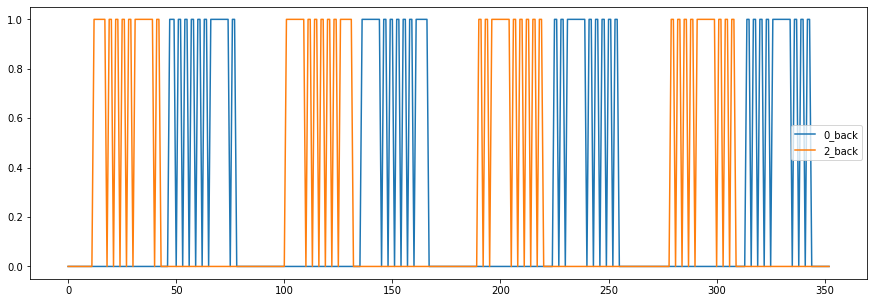

In [12]:
plt.figure(figsize=(15,5))
plt.plot(A, label='0_back')
plt.plot(B,label='2_back')
plt.legend()


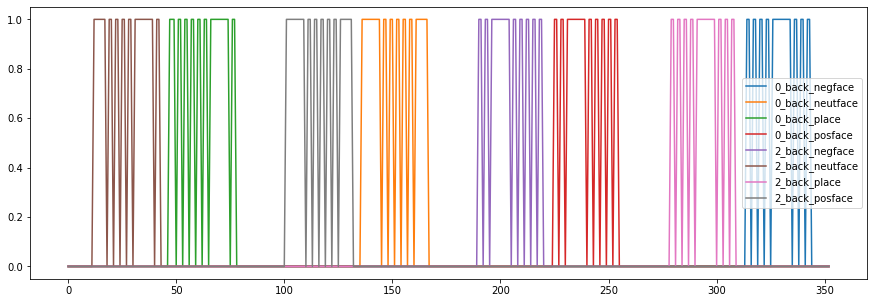

In [13]:
plt.figure(figsize=(15,5))
for c in design_matrix.columns[1:9]:
    plt.plot(design_matrix[c], label=c)
    plt.legend()

In [14]:
taskA = timeseries_all[A.astype('bool').astype('bool'), :]
taskB = timeseries_all[B.astype('bool').astype('bool'), :]

Cov is rank deficient!
Cov is rank deficient!


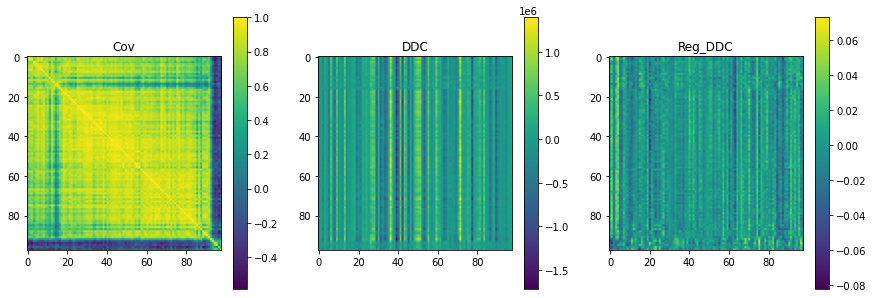

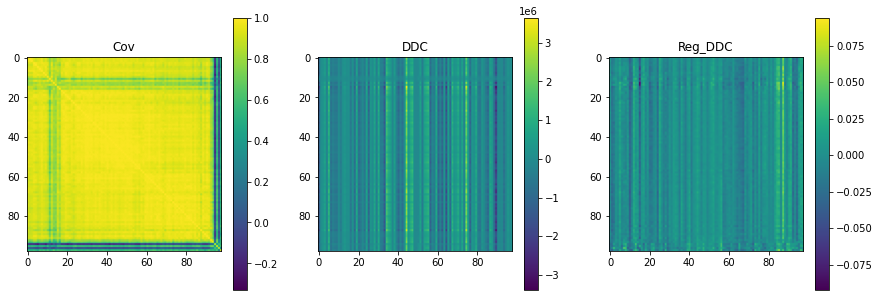

In [15]:
Cov, DDC, Reg_DDC, nl_DDC, qc_flag = compute_ddc(taskA, 0.8, "c")
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()

Cov, DDC, Reg_DDC, nl_DDC, qc_flag = compute_ddc(taskB, 0.8, "c")
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()

In [16]:
files[0][-10:]

'run-01.csv'